

# Project: Investigate a Dataset (Medical Appointment No Shows In Brazil -2016) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Medical field especially hospitals face many challenges and problems, one of them is the patients’ medical appointment commitment which can affect and waste resources.
What are the reasons that make a patient don't show up for his/her appointment?
To figure out, this project will investigate a dataset (Medical Appointment NO Shows In Brazil -2016)

Notes about some variables :  
- scholarship variable is an assistance program provides financial aid to poor Brazilian families. More information https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia  
- No-show variable: ‘No’ means the patients showed up to their appointment, and ‘Yes’ means they did not show up

## Posing Questions:  
1- Are women more careful and eager to show up for their appointments than men?  
2- Does age affect the appointment commitment?  
3- Is the scholarship makes people more committed?  

Import required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling



### General Properties

 Load csv file and read it as data frame

In [66]:
# Load csv data and print out a few lines. 
df_noshow = pd.read_csv('./data/noshowappointmen2016.csv',
                        parse_dates=['ScheduledDay','AppointmentDay'])#correct date columns data types
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###### Assessing Data

In [3]:
# 110527 rows /14 cloumns
df_noshow.shape

(110527, 14)

In [4]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [5]:
df_noshow.isnull().sum().any()

False

There is no missing values 

In [6]:
df_noshow.duplicated().sum()

0

There is no duplicated rows

In [7]:
df_noshow.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Number of unique values in each column 

In [8]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning :

Delete a row with age = -1  
Becaues there is no age in minus value

In [68]:
df_noshow.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [69]:
df_noshow.drop(99832,inplace=True)

 Drop extraneous columns,that are don't relate to our questions

In [4]:
#Drop extraneous columns that don't relate to the posing questions
df_noshow.drop(['ScheduledDay','AppointmentDay','Neighbourhood','Hipertension',
               'Diabetes','Alcoholism','Handcap','SMS_received'],axis=1,inplace=True)


Rename a No-show column,replace - by _ ,cause underscore is easire to use than -

In [5]:
#rename No-show column by replacing - by _
df_noshow.rename(columns = {'No-show':'No-show'.replace('-','_')},inplace=True)

Convert all columns names to a lower case,to make it easy to deal with column names

In [6]:
#convert all columns to a lowercase
df_noshow.rename(columns = lambda x : x.lower(),inplace=True)

In [7]:
df_noshow.head()

,patientid,appointmentid,gender,age,scholarship,no_show
0,2.987250e+13,5642903,F,62,0,No
1,5.589978e+14,5642503,M,56,0,No
2,4.262962e+12,5642549,F,62,0,No
3,8.679512e+11,5642828,F,8,0,No
4,8.841186e+12,5642494,F,56,0,No


In no_show column convert Yes to 1 and No to 0,to make it easier deal with data

In [8]:
#convert Yes to 1 and No to 0
df_noshow['no_show'].replace({'No': 0, 'Yes': 1},inplace=True)


In [14]:
df_noshow.head()

,patientid,appointmentid,gender,age,scholarship,no_show
0,2.987250e+13,5642903,F,62,0,0
1,5.589978e+14,5642503,M,56,0,0
2,4.262962e+12,5642549,F,62,0,0
3,8.679512e+11,5642828,F,8,0,0
4,8.841186e+12,5642494,F,56,0,0


<a id='eda'></a>
## Exploratory Data Analysis





###### Histograms for some variables

- Age histogram:

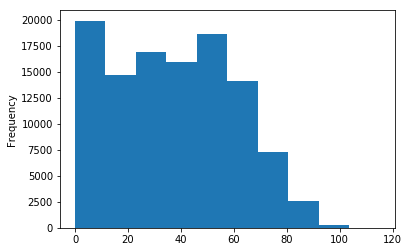

In [53]:
df_noshow.age.plot(kind ='hist');

Based on histogram the shape of the age distribution is right skewed

- no_show histogram:

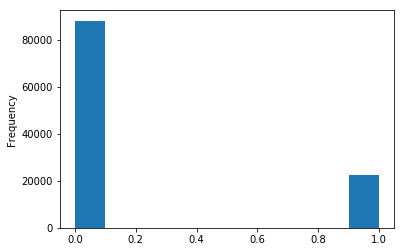

In [16]:
df_noshow.no_show.plot(kind ='hist');

Based on histogram the number of no show up patients is three times less than show up 

###### Scatterplots for some variables:

- scholarship histogram:

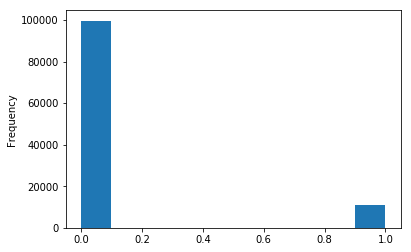

In [20]:
df_noshow.scholarship.plot(kind ='hist');

Based on histogram around 10000 have a scholarship

# Questions:

### Question1:
#### Are women more careful and eager to show up for their appointments than men?


To solve this question I will get the proportion of showed up male and female  
to figure out if sex has an effect in appointment commitment 

In [54]:

# get the total counts for each male and female
gender_total = df_noshow.groupby('gender').count()['patientid']

# get the total count for each male and female based on show up
gender_count = df_noshow.groupby(['gender','no_show']).count()['patientid']

# Function to calculate proportion  
def get_prop(gender_count,gender_total):
    return (gender_count/gender_total)

# get the proportion of showed up female 
female_prop = get_prop(gender_count[0],gender_total['F'])
# get the proportion of showed up male
male_prop = get_prop(gender_count[2],gender_total['M'])


visualization using bar chart

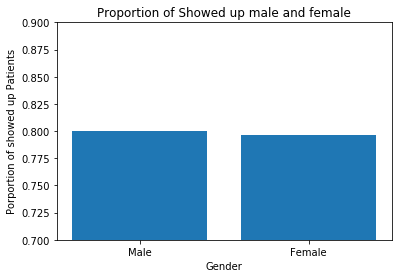

In [55]:
# create a bar chart
plt.bar(['Male','Female'],[male_prop,female_prop])
plt.title('Proportion of Showed up male and female')
plt.xlabel('Gender')
plt.ylabel('Porportion of showed up Patients')
plt.ylim(0.7,0.9);

### Question2:  
#### Does age affect the appointment commitment?

To solve this question I will divide ages in two main groups based on the median  
above median and below madian,by getting the median and count in each group.  
to figure out which group is more committed to their appointments 


In [56]:
# get the median age
# median = 37
median = df_noshow.age.median()



In [57]:
# create two data frames(above median and below median)
below_median = df_noshow.query('age < {}'.format(median))
above_median = df_noshow.query('age >= {}'.format(median))



In [58]:
#get the number of people for each ages base on show up
count_below_median = below_median.query('no_show == 0')['patientid'].count()
count_above_median = above_median.query('no_show == 0')['patientid'].count()


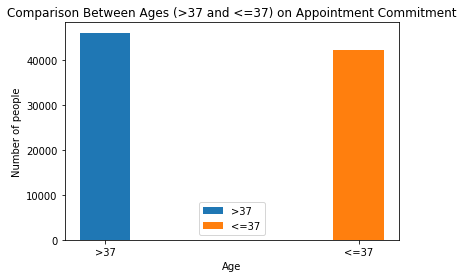

In [59]:
# create a bar chart
width = 0.20
above = plt.bar(1, count_above_median, width, label = '>37')
below = plt.bar(2, count_below_median, width, label = '<=37')
labels = ['>37','<=37']
plt.xticks([1,2], labels)
plt.title('Comparison Between Ages (>37 and <=37) on Appointment Commitment')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend();

### Question3:  
#### Is the scholarship makes people more committed?

To solve this question I will count the show up and no show up people with scholarship  
to figure out if the scholarship makes patients more carefull about their appointments 

In [60]:
# get the people with scholarship
sch = df_noshow.query('scholarship == 1')


In [61]:
# get count of peolpe they showed up (with scholarship) 
sch_show = sch.query('no_show == 0 ')['patientid'].count()

# get count of peolpe they  did't showe up (with scholarship)
sch_noshow = sch.query('no_show == 1 ')['patientid'].count()


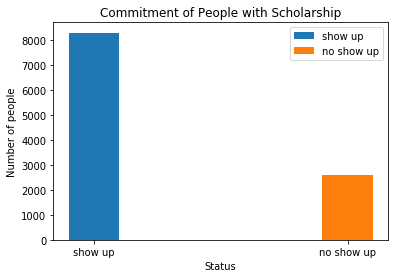

In [62]:
# create a bar chart
width = 0.20
above = plt.bar(1, sch_show, width, label = 'show up')
below = plt.bar(2, sch_noshow, width, label = 'no show up')
labels = ['show up','no show up']
plt.xticks([1,2], labels)
plt.title('Commitment of People with Scholarship')
plt.xlabel('Status')
plt.ylabel('Number of people')
plt.legend();

<a id='conclusions'></a>
## Conclusions

Overall, the most significant features on the charts are,
There is no sex factor affects the appointment commitment. The proportion of committed male and female almost equal.  
Related to age, above 37 are more likely to commit their appointments than
Below 37.  
The scholarship has a great effect to make people more committed. The number
of non-committed people about 2500, while the committed people around 8000
(about three times as high as non-committed)

#### Limitations:  
Understanding and be mindful to some variables such as understanding the meaning
of scholarship, and no_show data, ‘No’ means the patients showed up to their appointment, and ‘Yes’ means they did not show up





Resources:  
https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe